In [1]:
import tensorflow as tf

print(f'tensorflow version {tf.__version__}')

from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import * 

import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

tensorflow version 2.10.0


In [2]:
def dataLoad():
    test = pd.read_csv('/Users/paolo/Documents/TC/data/test_real_tom_target.csv')
    train = pd.read_csv('/Users/paolo/Documents/TC/data/training_real_tom_target.csv')
    val = pd.read_csv('/Users/paolo/Documents/TC/data/validation_real_tom_target.csv')
    print(train.head())
    
    #Split data
    x_train = train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******training features******")
    print (x_train)
    y_train = train[['Real_tom_lsm']]
    print ("******training target******")
    print (y_train)
    
    x_test = test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******test features******")
    print (x_test)
    y_test = test[['Real_tom_lsm']]
    print ("******test target******")
    print (y_test)
    
    x_val = val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******validation features******")
    print (x_val)
    y_val = val[['Real_tom_lsm']]
    print ("******validation target******")
    print (y_val)
    
    print('Before Smote')

    dff = y_train
    M = y_train.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
    
    smt = SMOTE()
    
    X_train_sm, Y_train_sm = smt.fit_resample(x_train, y_train)
    
    print('After SMOTE')
    dff = Y_train_sm
    M = Y_train_sm.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
        
    return X_train_sm, Y_train_sm, x_val, y_val, x_test, y_test

In [3]:
x_train_sm, y_train_sm, x_val, y_val, x_test, y_test = dataLoad()

   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660   
1           1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733   
2           2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676   
3           3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573   
4           4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505   

      u_850     v_200     v_850        ttr  sst  lsm  Real_tom_lsm  
0 -3.323872  1.687164 -1.823624 -247.54074  0.0  0.0           0.0  
1 -2.844494  1.060593 -1.991425 -240.00592  0.0  0.0           0.0  
2 -2.125244  3.280617 -1.931789 -223.76889  0.0  0.0           0.0  
3 -1.122395  5.743889 -1.243538 -235.55556  0.0  0.0           0.0  
4 -1.362953  6.514030 -0.954163 -254.03260  0.0  0.0           0.0  
******training features******
               vo          r      u_200     u_850      v_200     v_85

In [4]:
from sklearn.preprocessing import StandardScaler
trainScaler = StandardScaler()

x_train_scaled = trainScaler.fit_transform(x_train_sm)
x_val_scaled = trainScaler.transform(x_val)
x_test_scaled = trainScaler.transform(x_test)


# Logistic Regression

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

def logistic_regression_with_val(x,y,x_val,y_val):
    for C in [100, 10, 1.0, 0.1, 0.01]:
    #for C in [0.001, 0.0001]:
    #for C in [0.00001]:
        for penalty in ['l1','l2','elasticnet','none']:
            for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
                try:
                    print(f'##########################Penalty:{penalty}, solver:{solver}, C{C}##########################')
                    clf = LogisticRegression(random_state=0, penalty=penalty, solver=solver, C=C).fit(x, y)
                    print(clf.coef_)
                    print(clf.intercept_)
                    
                    #preds = clf.predict(x_val)
                    #plot_roc(preds,y_val)
    
                    conf = confusion_matrix(y_val, np.round(preds))
                    np.set_printoptions(precision=2)
                    print(conf)  
                except: continue

### not scaled

In [8]:
logistic_regression_with_val(x_train_sm,y_train_sm.values.reshape(-1,),x_val,y_val.values.reshape(-1,))

##########################Penalty:l1, solver:newton-cg, C100##########################
##########################Penalty:l1, solver:lbfgs, C100##########################
##########################Penalty:l1, solver:liblinear, C100##########################
[[-1.14100000e+04  1.95873966e-02 -1.29072276e-02 -1.31773280e-01
  -1.11356701e-02  9.08054667e-03  2.59855853e-02  6.15402618e-03]]
[2.79707705]
##########################Penalty:l1, solver:sag, C100##########################
##########################Penalty:l1, solver:saga, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[-0.01787927  0.02282984 -0.01340935 -0.12266261 -0.01271144  0.01505658
   0.02797418  0.00676315]]
[3.07263242]
##########################Penalty:l2, solver:newton-cg, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[[-1.47525848e+03  2.23885019e-02 -1.33590535e-02 -1.23677733e-01
  -1.25303291e-02  1.43183643e-02  2.76178576e-02  6.66701544e-03]]
[3.01767173]
##########################Penalty:l2, solver:lbfgs, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[-0.00161334  0.02277394 -0.01340896 -0.12267052 -0.01276016  0.01469881
   0.02796808  0.00676487]]
[3.07383843]
##########################Penalty:l2, solver:liblinear, C100##########################
[[-0.00230972  0.02297315 -0.01338322 -0.12256776 -0.01271754  0.01511003
   0.02789746  0.00676965]]
[3.04400956]
##########################Penalty:l2, solver:sag, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[-0.0352809   0.02282969 -0.01340938 -0.12266271 -0.01271144  0.01505654
   0.02797425  0.00676314]]
[3.07265935]
##########################Penalty:l2, solver:saga, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-0.01788936  0.02282984 -0.01340935 -0.12266261 -0.01271144  0.01505658
   0.02797418  0.00676315]]
[3.07263242]
##########################Penalty:elasticnet, solver:newton-cg, C100##########################
##########################Penalty:elasticnet, solver:lbfgs, C100##########################
##########################Penalty:elasticnet, solver:liblinear, C100##########################
##########################Penalty:elasticnet, solver:sag, C100##########################
##########################Penalty:elasticnet, solver:saga, C100##########################
##########################Penalty:none, solver:newton-cg, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-2.48575261e+04  1.66162548e-02 -1.20398961e-02 -1.44699238e-01
  -9.04437139e-03  1.30820522e-03  2.49892816e-02  5.71850212e-03]]
[2.69653649]
##########################Penalty:none, solver:lbfgs, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-0.00161889  0.0225156  -0.01402605 -0.12175349 -0.01313763  0.01074686
   0.02787252  0.00672153]]
[3.08392152]
##########################Penalty:none, solver:liblinear, C100##########################
##########################Penalty:none, solver:sag, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-0.03529748  0.02282969 -0.01340938 -0.12266271 -0.01271144  0.01505654
   0.02797425  0.00676314]]
[3.07265935]
##########################Penalty:none, solver:saga, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[-0.01788946  0.02282984 -0.01340935 -0.12266261 -0.01271144  0.01505658
   0.02797418  0.00676315]]
[3.07263242]
##########################Penalty:l1, solver:newton-cg, C10##########################
##########################Penalty:l1, solver:lbfgs, C10##########################
##########################Penalty:l1, solver:liblinear, C10##########################
[[-1.14100000e+04  1.95874358e-02 -1.29072208e-02 -1.31773256e-01
  -1.11356706e-02  9.08055234e-03  2.59855631e-02  6.15402798e-03]]
[2.79706891]
##########################Penalty:l1, solver:sag, C10##########################
##########################Penalty:l1, solver:saga, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[-0.01778752  0.02282983 -0.01340935 -0.12266261 -0.01271144  0.01505658
   0.02797418  0.00676315]]
[3.07263242]
##########################Penalty:l2, solver:newton-cg, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[[-1.71078324e+02  2.27783075e-02 -1.34037401e-02 -1.22777083e-01
  -1.26908834e-02  1.49713314e-02  2.79311054e-02  6.75168136e-03]]
[3.06592167]
##########################Penalty:l2, solver:lbfgs, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[-0.00161318  0.02282256 -0.01341023 -0.12270185 -0.012661    0.01502647
   0.02797571  0.0067631 ]]
[3.07351902]
##########################Penalty:l2, solver:liblinear, C10##########################
[[-0.0023097   0.02297325 -0.0133832  -0.12256769 -0.01271754  0.01511006
   0.0278974   0.00676966]]
[3.04398821]
##########################Penalty:l2, solver:sag, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[-0.03528506  0.02282969 -0.01340938 -0.12266271 -0.01271144  0.01505654
   0.02797425  0.00676314]]
[3.07265935]
##########################Penalty:l2, solver:saga, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-0.0178885   0.02282984 -0.01340935 -0.12266261 -0.01271144  0.01505658
   0.02797418  0.00676315]]
[3.07263241]
##########################Penalty:elasticnet, solver:newton-cg, C10##########################
##########################Penalty:elasticnet, solver:lbfgs, C10##########################
##########################Penalty:elasticnet, solver:liblinear, C10##########################
##########################Penalty:elasticnet, solver:sag, C10##########################
##########################Penalty:elasticnet, solver:saga, C10##########################
##########################Penalty:none, solver:newton-cg, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-2.48575261e+04  1.66162548e-02 -1.20398961e-02 -1.44699238e-01
  -9.04437139e-03  1.30820522e-03  2.49892816e-02  5.71850212e-03]]
[2.69653649]
##########################Penalty:none, solver:lbfgs, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-0.00161889  0.0225156  -0.01402605 -0.12175349 -0.01313763  0.01074686
   0.02787252  0.00672153]]
[3.08392152]
##########################Penalty:none, solver:liblinear, C10##########################
##########################Penalty:none, solver:sag, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-0.03529748  0.02282969 -0.01340938 -0.12266271 -0.01271144  0.01505654
   0.02797425  0.00676314]]
[3.07265935]
##########################Penalty:none, solver:saga, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[-0.01788946  0.02282984 -0.01340935 -0.12266261 -0.01271144  0.01505658
   0.02797418  0.00676315]]
[3.07263242]
##########################Penalty:l1, solver:newton-cg, C1.0##########################
##########################Penalty:l1, solver:lbfgs, C1.0##########################
##########################Penalty:l1, solver:liblinear, C1.0##########################
[[-1.14100000e+04  1.95878280e-02 -1.29071529e-02 -1.31773012e-01
  -1.11356751e-02  9.08060901e-03  2.59853405e-02  6.15404593e-03]]
[2.79698757]
##########################Penalty:l1, solver:sag, C1.0##########################
##########################Penalty:l1, solver:saga, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[-0.01687008  0.02282983 -0.01340935 -0.12266258 -0.01271143  0.01505655
   0.02797418  0.00676315]]
[3.07263245]
##########################Penalty:l2, solver:newton-cg, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[[-1.72443275e+01  2.28245194e-02 -1.34088083e-02 -1.22674168e-01
  -1.27093764e-02  1.50479723e-02  2.79698862e-02  6.76198358e-03]]
[3.07197705]
##########################Penalty:l2, solver:lbfgs, C1.0##########################
[[-0.00161382  0.02281735 -0.0134356  -0.1226757  -0.01271042  0.01502779
   0.02797861  0.0067624 ]]
[3.07467292]
##########################Penalty:l2, solver:liblinear, C1.0##########################
[[-0.00230952  0.02297442 -0.01338302 -0.12256699 -0.01271758  0.01511032
   0.02789677  0.00676971]]
[3.04375368]
##########################Penalty:l2, solver:sag, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[-0.03523984  0.02282969 -0.01340938 -0.1226627  -0.01271144  0.01505654
   0.02797425  0.00676314]]
[3.07265933]
##########################Penalty:l2, solver:saga, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[-0.01787984  0.02282984 -0.01340935 -0.12266261 -0.01271145  0.01505658
   0.02797418  0.00676315]]
[3.07263238]
##########################Penalty:elasticnet, solver:newton-cg, C1.0##########################
##########################Penalty:elasticnet, solver:lbfgs, C1.0##########################
##########################Penalty:elasticnet, solver:liblinear, C1.0##########################
##########################Penalty:elasticnet, solver:sag, C1.0##########################
##########################Penalty:elasticnet, solver:saga, C1.0##########################
##########################Penalty:none, solver:newton-cg, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[[-2.48575261e+04  1.66162548e-02 -1.20398961e-02 -1.44699238e-01
  -9.04437139e-03  1.30820522e-03  2.49892816e-02  5.71850212e-03]]
[2.69653649]
##########################Penalty:none, solver:lbfgs, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[-0.00161889  0.0225156  -0.01402605 -0.12175349 -0.01313763  0.01074686
   0.02787252  0.00672153]]
[3.08392152]
##########################Penalty:none, solver:liblinear, C1.0##########################
##########################Penalty:none, solver:sag, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[-0.03529748  0.02282969 -0.01340938 -0.12266271 -0.01271144  0.01505654
   0.02797425  0.00676314]]
[3.07265935]
##########################Penalty:none, solver:saga, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[-0.01788946  0.02282984 -0.01340935 -0.12266261 -0.01271144  0.01505658
   0.02797418  0.00676315]]
[3.07263242]
##########################Penalty:l1, solver:newton-cg, C0.1##########################
##########################Penalty:l1, solver:lbfgs, C0.1##########################
##########################Penalty:l1, solver:liblinear, C0.1##########################
[[-9.83802143e+03  2.00228908e-02 -1.29874805e-02 -1.30376245e-01
  -1.13705927e-02  9.94255290e-03  2.61625839e-02  6.22326115e-03]]
[2.8148497]
##########################Penalty:l1, solver:sag, C0.1##########################
##########################Penalty:l1, solver:saga, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[-0.00769569  0.0228298  -0.01340932 -0.12266235 -0.01271128  0.01505625
   0.02797416  0.00676315]]
[3.07263279]
##########################Penalty:l2, solver:newton-cg, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[[-1.72581371  0.02282918 -0.01340932 -0.12266379 -0.01271124  0.0150557
   0.02797382  0.00676303]]
[3.07259196]
##########################Penalty:l2, solver:lbfgs, C0.1##########################
[[-0.0016127   0.02283021 -0.01340904 -0.12265777 -0.01270784  0.01506402
   0.02797405  0.00676315]]
[3.07260214]
##########################Penalty:l2, solver:liblinear, C0.1##########################
[[-0.00230775  0.02298609 -0.01338118 -0.12256    -0.012718    0.01511282
   0.02789049  0.00677024]]
[3.04141378]
##########################Penalty:l2, solver:sag, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[-0.0349178   0.02282969 -0.01340937 -0.12266266 -0.01271144  0.01505654
   0.02797425  0.00676314]]
[3.07265908]
##########################Penalty:l2, solver:saga, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-0.01779362  0.02282984 -0.01340935 -0.12266257 -0.01271145  0.01505658
   0.02797418  0.00676315]]
[3.07263207]
##########################Penalty:elasticnet, solver:newton-cg, C0.1##########################
##########################Penalty:elasticnet, solver:lbfgs, C0.1##########################
##########################Penalty:elasticnet, solver:liblinear, C0.1##########################
##########################Penalty:elasticnet, solver:sag, C0.1##########################
##########################Penalty:elasticnet, solver:saga, C0.1##########################
##########################Penalty:none, solver:newton-cg, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-2.48575261e+04  1.66162548e-02 -1.20398961e-02 -1.44699238e-01
  -9.04437139e-03  1.30820522e-03  2.49892816e-02  5.71850212e-03]]
[2.69653649]
##########################Penalty:none, solver:lbfgs, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-0.00161889  0.0225156  -0.01402605 -0.12175349 -0.01313763  0.01074686
   0.02787252  0.00672153]]
[3.08392152]
##########################Penalty:none, solver:liblinear, C0.1##########################
##########################Penalty:none, solver:sag, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-0.03529748  0.02282969 -0.01340938 -0.12266271 -0.01271144  0.01505654
   0.02797425  0.00676314]]
[3.07265935]
##########################Penalty:none, solver:saga, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[-0.01788946  0.02282984 -0.01340935 -0.12266261 -0.01271144  0.01505658
   0.02797418  0.00676315]]
[3.07263242]
##########################Penalty:l1, solver:newton-cg, C0.01##########################
##########################Penalty:l1, solver:lbfgs, C0.01##########################
##########################Penalty:l1, solver:liblinear, C0.01##########################
[[ 0.          0.02292209 -0.01339578 -0.12260034 -0.01271555  0.01506968
   0.02792187  0.00676616]]
[3.05382465]
##########################Penalty:l1, solver:sag, C0.01##########################
##########################Penalty:l1, solver:saga, C0.01##########################
[[ 0.          0.02292395 -0.01339504 -0.12260338 -0.01271389  0.01507395
   0.02792309  0.00676744]]
[3.05371273]
##########################Penalty:l2, solver:newton-cg, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[[-0.17259514  0.02282965 -0.01340935 -0.12266236 -0.01271148  0.01505649
   0.0279742   0.00676313]]
[3.07265101]
##########################Penalty:l2, solver:lbfgs, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[-0.00140172  0.02486953 -0.01144723 -0.12094532 -0.0168763   0.01978379
   0.02669943  0.00660716]]
[2.67038698]
##########################Penalty:l2, solver:liblinear, C0.01##########################
[[-0.00228688  0.02311659 -0.0133638  -0.12249035 -0.01272114  0.01511945
   0.02781968  0.0067762 ]]
[3.01511424]
##########################Penalty:l2, solver:sag, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[-0.03192464  0.02282969 -0.01340935 -0.12266227 -0.0127115   0.01505656
   0.02797423  0.00676314]]
[3.07265664]
##########################Penalty:l2, solver:saga, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-0.01696223  0.02282983 -0.01340933 -0.12266218 -0.0127115   0.0150566
   0.02797416  0.00676315]]
[3.07262895]
##########################Penalty:elasticnet, solver:newton-cg, C0.01##########################
##########################Penalty:elasticnet, solver:lbfgs, C0.01##########################
##########################Penalty:elasticnet, solver:liblinear, C0.01##########################
##########################Penalty:elasticnet, solver:sag, C0.01##########################
##########################Penalty:elasticnet, solver:saga, C0.01##########################
##########################Penalty:none, solver:newton-cg, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-2.48575261e+04  1.66162548e-02 -1.20398961e-02 -1.44699238e-01
  -9.04437139e-03  1.30820522e-03  2.49892816e-02  5.71850212e-03]]
[2.69653649]
##########################Penalty:none, solver:lbfgs, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-0.00161889  0.0225156  -0.01402605 -0.12175349 -0.01313763  0.01074686
   0.02787252  0.00672153]]
[3.08392152]
##########################Penalty:none, solver:liblinear, C0.01##########################
##########################Penalty:none, solver:sag, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-0.03529748  0.02282969 -0.01340938 -0.12266271 -0.01271144  0.01505654
   0.02797425  0.00676314]]
[3.07265935]
##########################Penalty:none, solver:saga, C0.01##########################
[[-0.01788946  0.02282984 -0.01340935 -0.12266261 -0.01271144  0.01505658
   0.02797418  0.00676315]]
[3.07263242]


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### scaled

##########################Penalty:l1, solver:newton-cg, C100##########################
##########################Penalty:l1, solver:newton-cg, C10##########################
##########################Penalty:l1, solver:newton-cg, C1.0##########################
##########################Penalty:l1, solver:newton-cg, C0.1##########################
##########################Penalty:l1, solver:newton-cg, C0.01##########################
##########################Penalty:l1, solver:lbfgs, C100##########################
##########################Penalty:l1, solver:lbfgs, C10##########################
##########################Penalty:l1, solver:lbfgs, C1.0##########################
##########################Penalty:l1, solver:lbfgs, C0.1##########################
##########################Penalty:l1, solver:lbfgs, C0.01##########################
##########################Penalty:l1, solver:liblinear, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


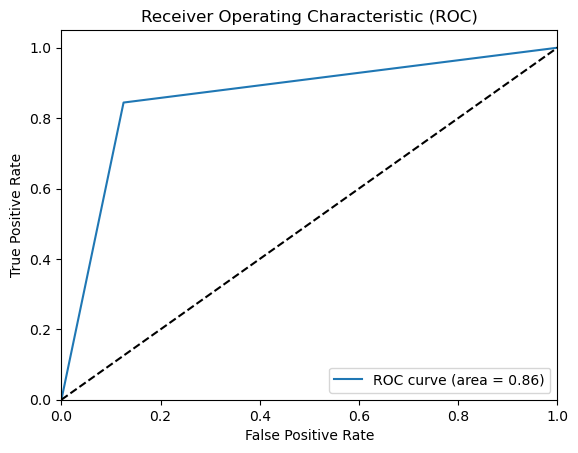

[[601050  86113]
 [   193   1046]]
##########################Penalty:l1, solver:liblinear, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


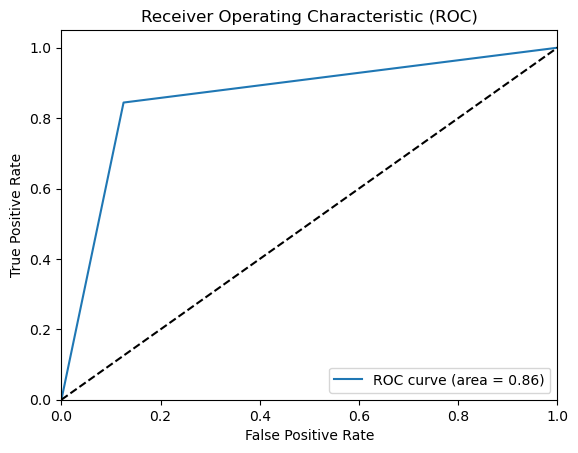

[[601050  86113]
 [   193   1046]]
##########################Penalty:l1, solver:liblinear, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


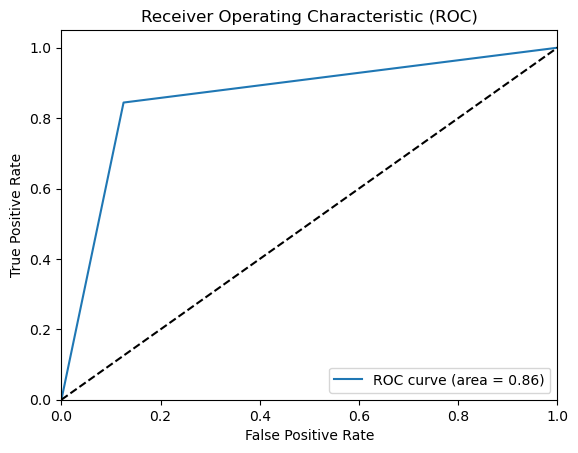

[[601050  86113]
 [   193   1046]]
##########################Penalty:l1, solver:liblinear, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


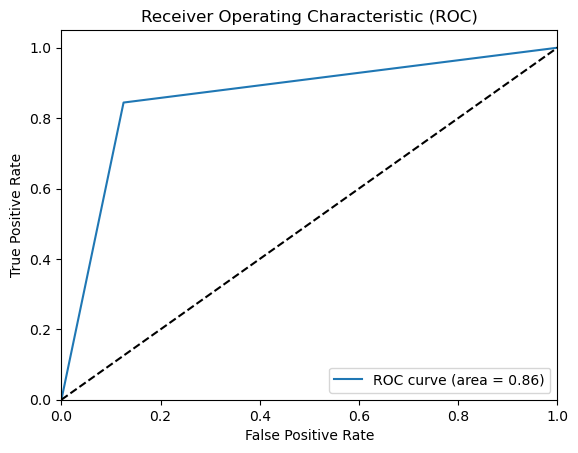

[[601051  86112]
 [   193   1046]]
##########################Penalty:l1, solver:liblinear, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


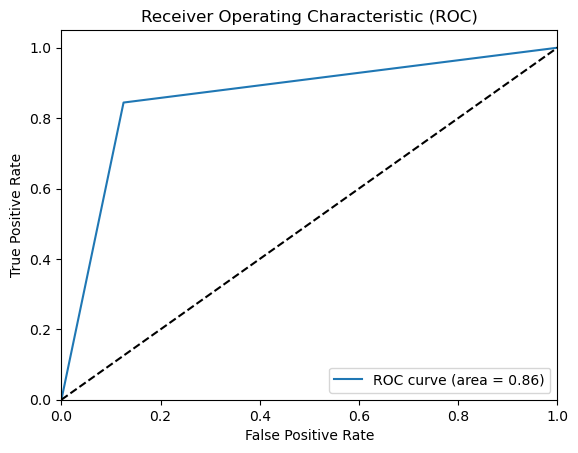

[[601062  86101]
 [   193   1046]]
##########################Penalty:l1, solver:sag, C100##########################
##########################Penalty:l1, solver:sag, C10##########################
##########################Penalty:l1, solver:sag, C1.0##########################
##########################Penalty:l1, solver:sag, C0.1##########################
##########################Penalty:l1, solver:sag, C0.01##########################
##########################Penalty:l1, solver:saga, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


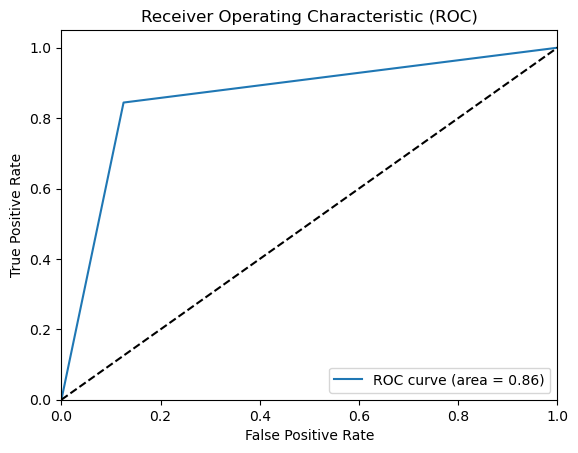

[[601051  86112]
 [   193   1046]]
##########################Penalty:l1, solver:saga, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


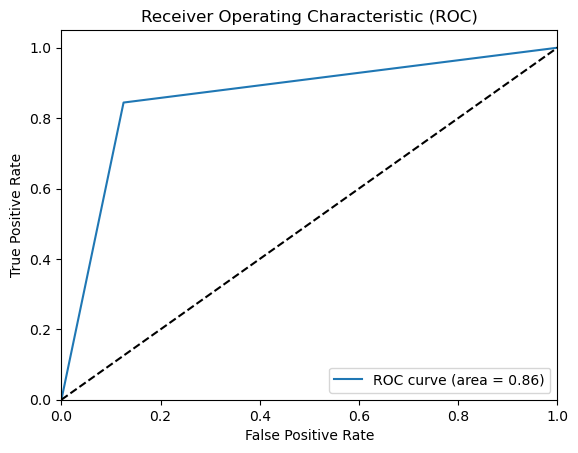

[[601051  86112]
 [   193   1046]]
##########################Penalty:l1, solver:saga, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


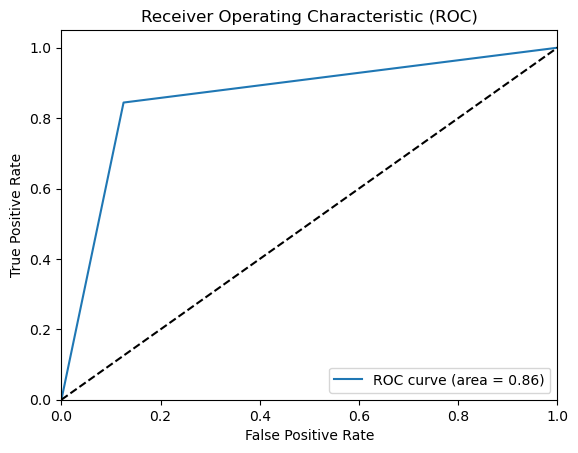

[[601051  86112]
 [   193   1046]]
##########################Penalty:l1, solver:saga, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


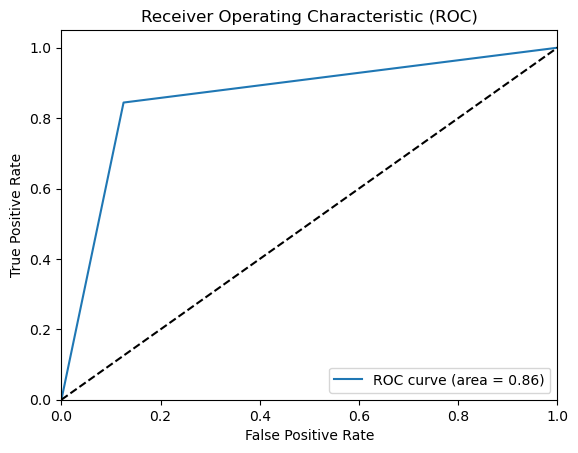

[[601050  86113]
 [   193   1046]]
##########################Penalty:l1, solver:saga, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


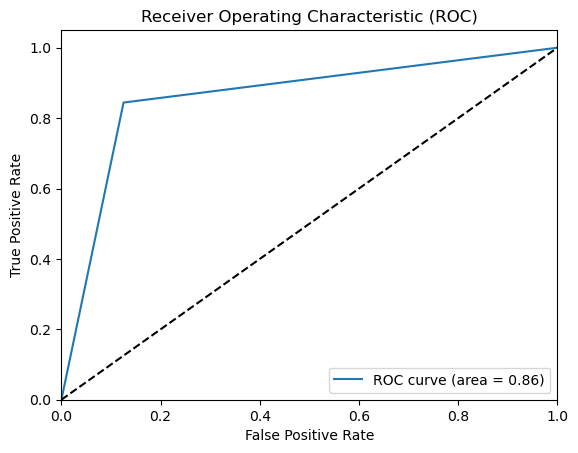

[[601053  86110]
 [   193   1046]]
##########################Penalty:l2, solver:newton-cg, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


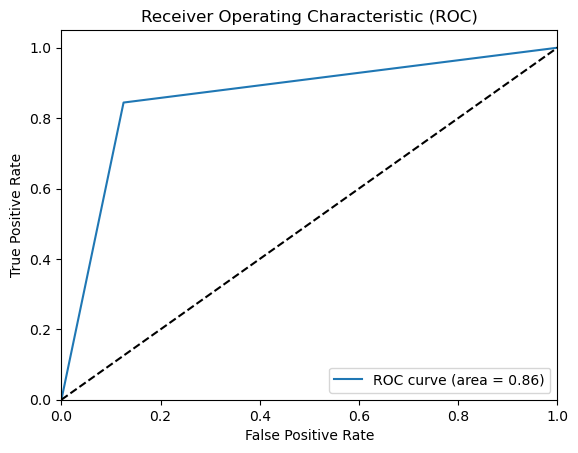

[[601050  86113]
 [   193   1046]]
##########################Penalty:l2, solver:newton-cg, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


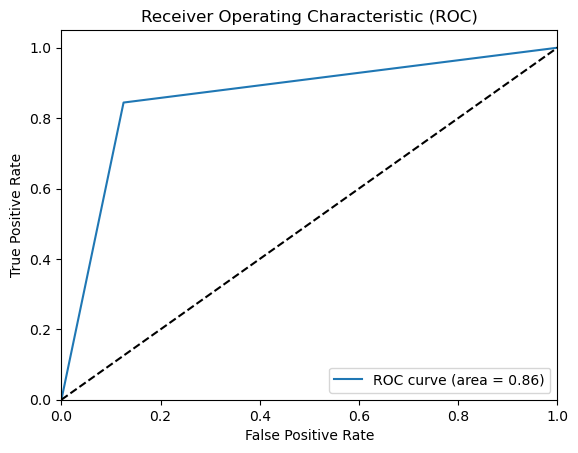

[[601050  86113]
 [   193   1046]]
##########################Penalty:l2, solver:newton-cg, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


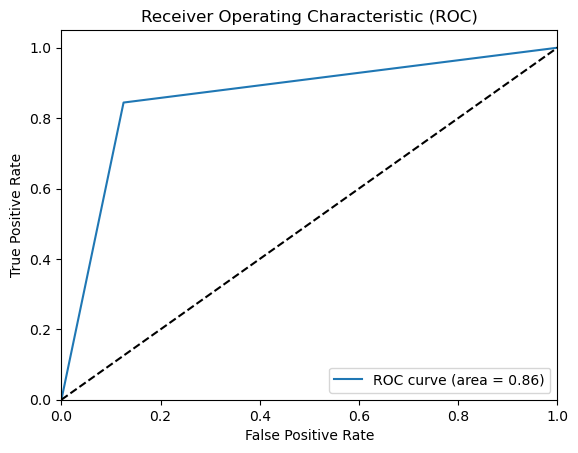

[[601050  86113]
 [   193   1046]]
##########################Penalty:l2, solver:newton-cg, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


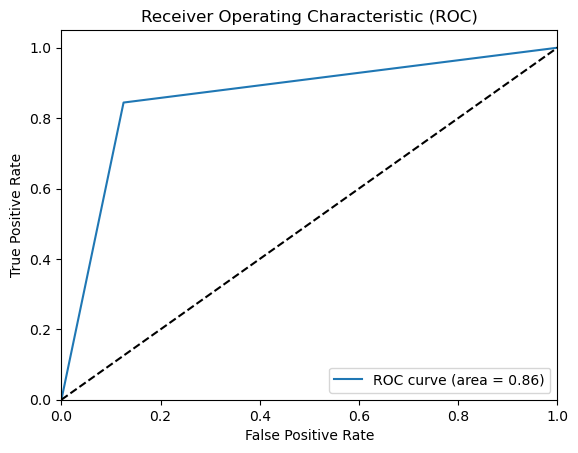

[[601050  86113]
 [   193   1046]]
##########################Penalty:l2, solver:newton-cg, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


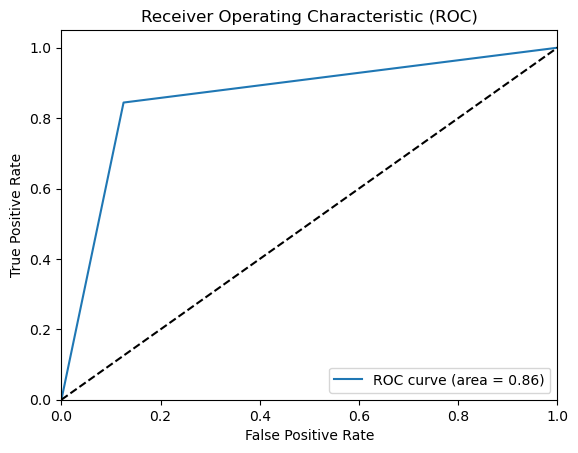

[[601051  86112]
 [   193   1046]]
##########################Penalty:l2, solver:lbfgs, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


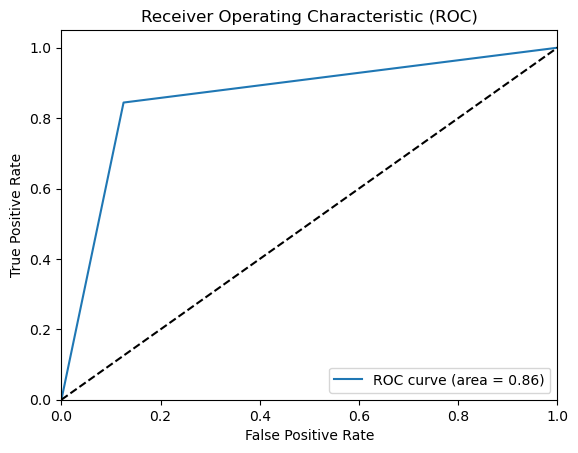

[[601051  86112]
 [   193   1046]]
##########################Penalty:l2, solver:lbfgs, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


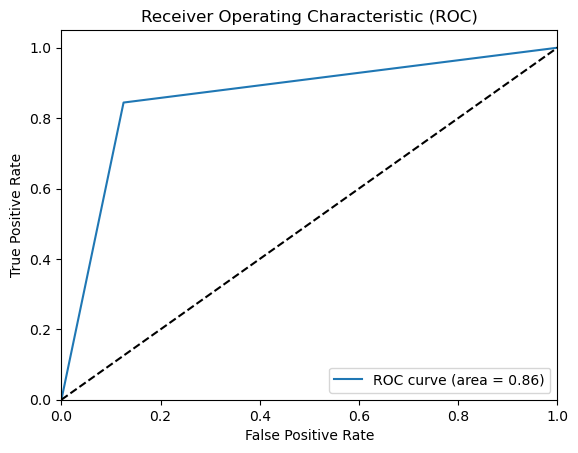

[[601051  86112]
 [   193   1046]]
##########################Penalty:l2, solver:lbfgs, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


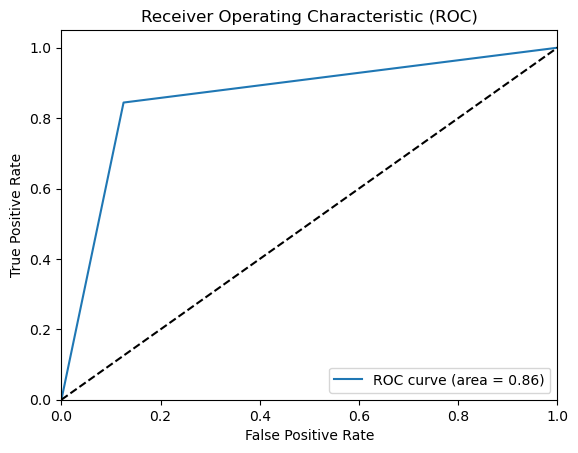

[[601051  86112]
 [   193   1046]]
##########################Penalty:l2, solver:lbfgs, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


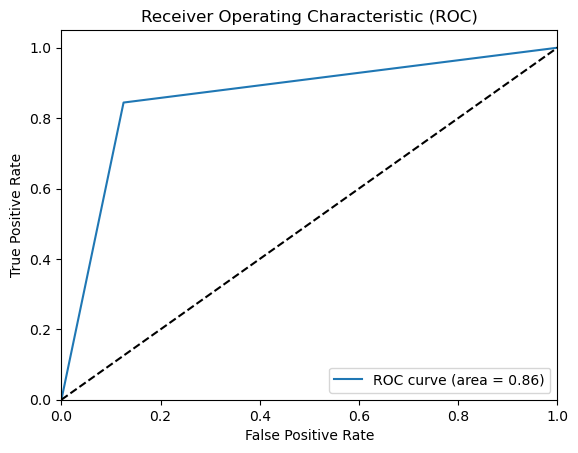

[[601050  86113]
 [   193   1046]]
##########################Penalty:l2, solver:lbfgs, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


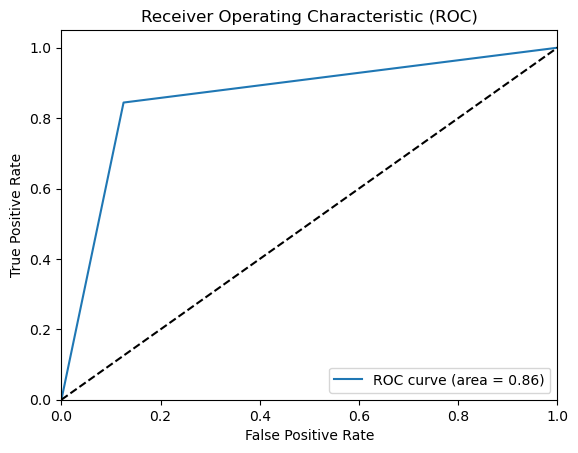

[[601052  86111]
 [   193   1046]]
##########################Penalty:l2, solver:liblinear, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


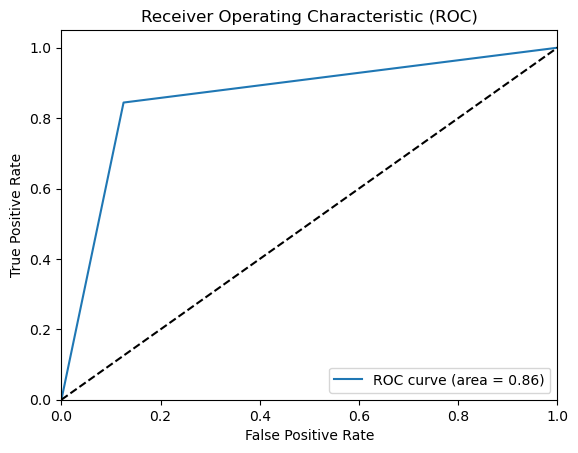

[[601050  86113]
 [   193   1046]]
##########################Penalty:l2, solver:liblinear, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


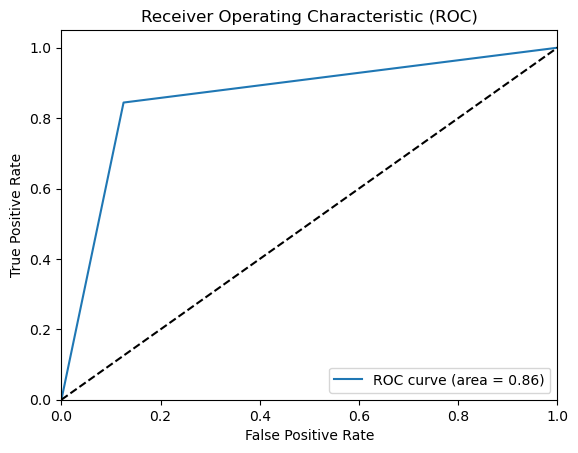

[[601050  86113]
 [   193   1046]]
##########################Penalty:l2, solver:liblinear, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


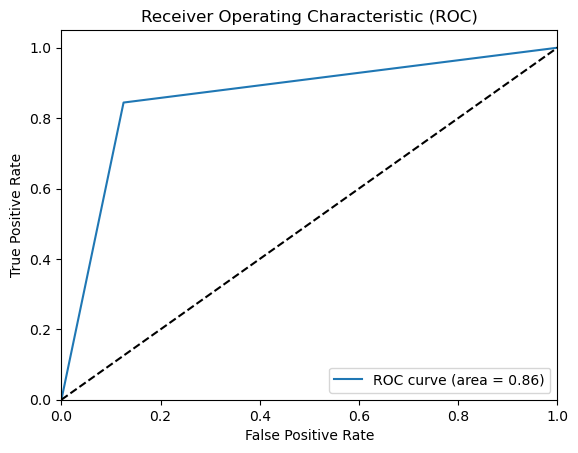

[[601050  86113]
 [   193   1046]]
##########################Penalty:l2, solver:liblinear, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


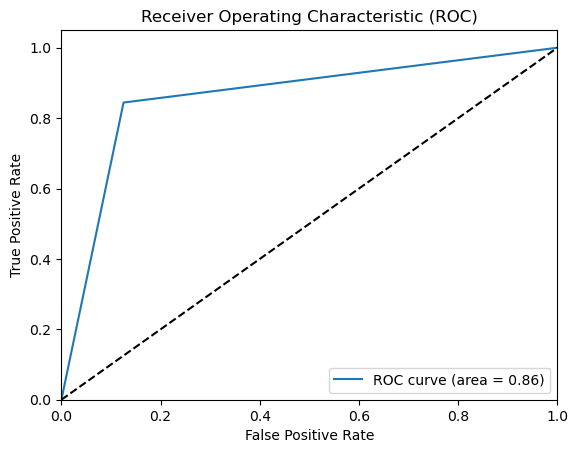

[[601049  86114]
 [   193   1046]]
##########################Penalty:l2, solver:liblinear, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


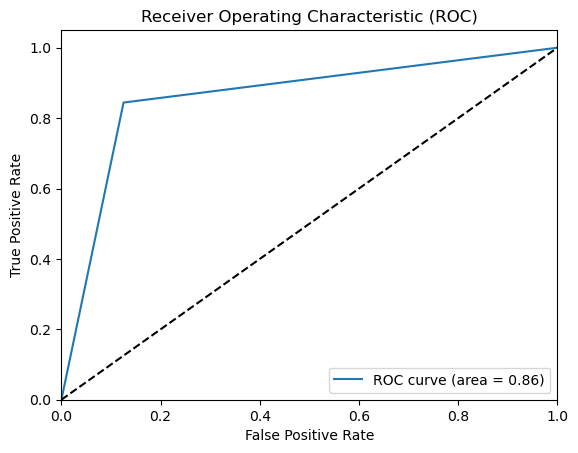

[[601054  86109]
 [   193   1046]]
##########################Penalty:l2, solver:sag, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


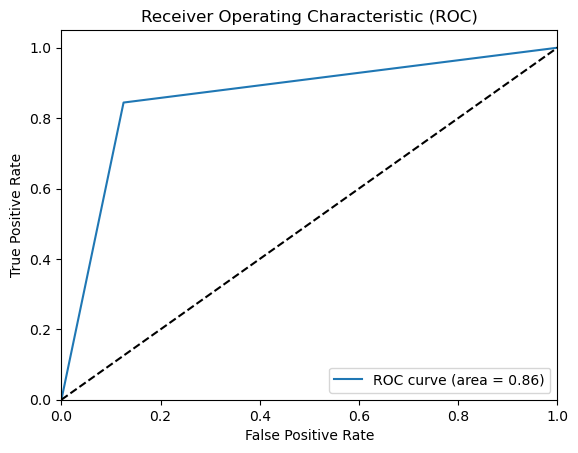

[[601051  86112]
 [   193   1046]]
##########################Penalty:l2, solver:sag, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


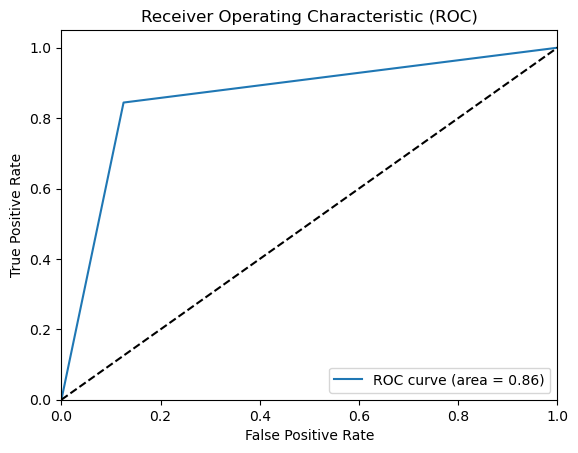

[[601051  86112]
 [   193   1046]]
##########################Penalty:l2, solver:sag, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


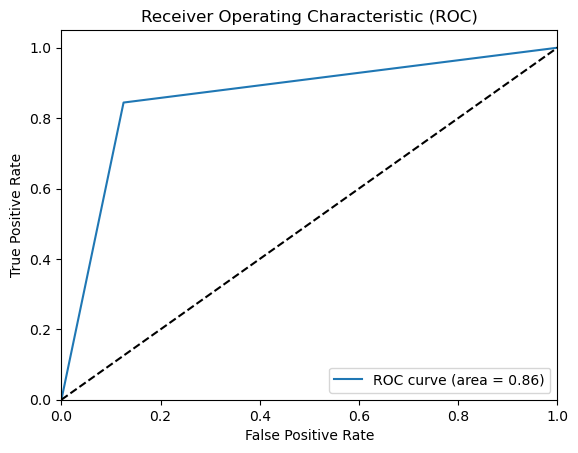

[[601051  86112]
 [   193   1046]]
##########################Penalty:l2, solver:sag, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


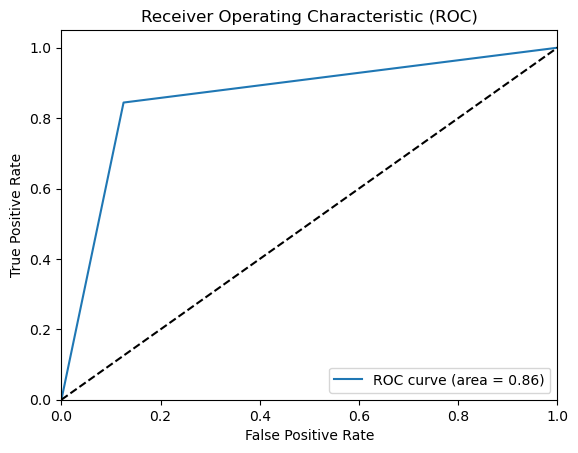

[[601050  86113]
 [   193   1046]]
##########################Penalty:l2, solver:sag, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


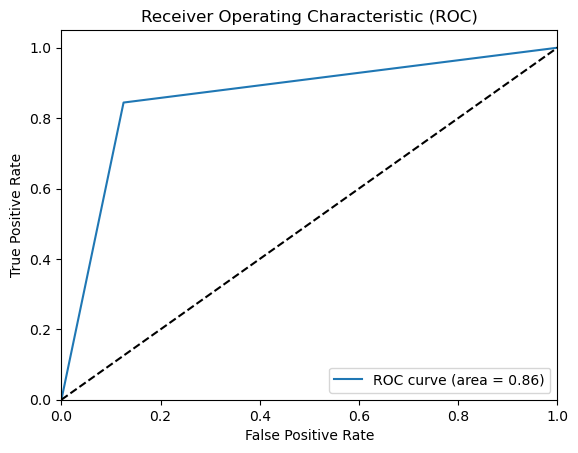

[[601051  86112]
 [   193   1046]]
##########################Penalty:l2, solver:saga, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


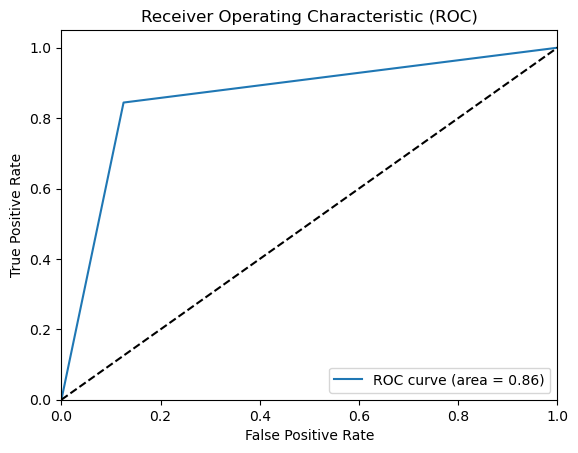

[[601051  86112]
 [   193   1046]]
##########################Penalty:l2, solver:saga, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


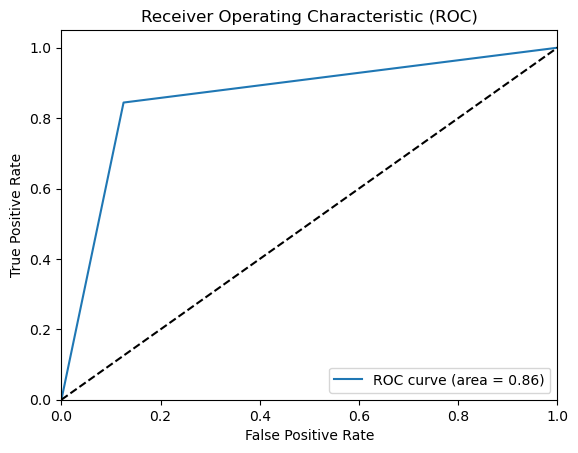

[[601051  86112]
 [   193   1046]]
##########################Penalty:l2, solver:saga, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


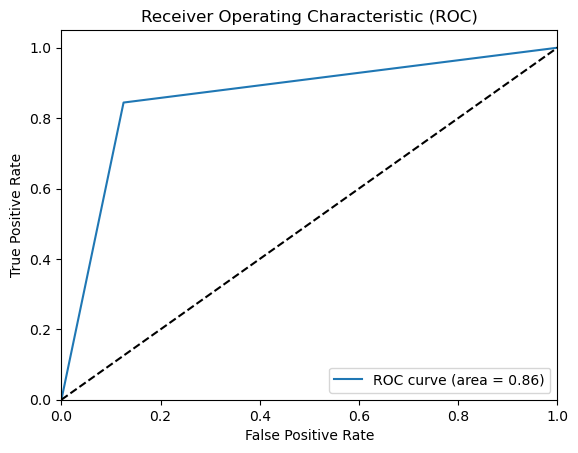

[[601050  86113]
 [   193   1046]]
##########################Penalty:l2, solver:saga, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


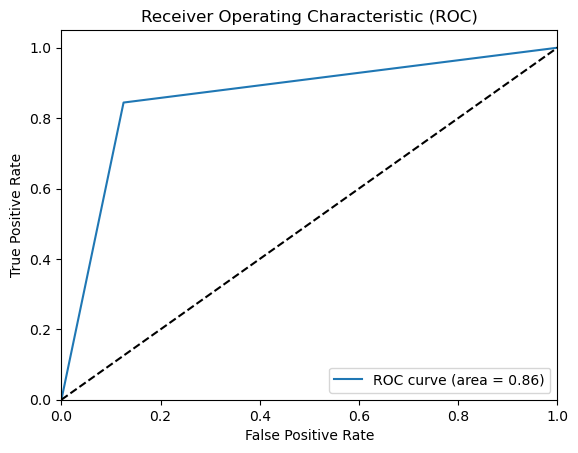

[[601050  86113]
 [   193   1046]]
##########################Penalty:l2, solver:saga, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


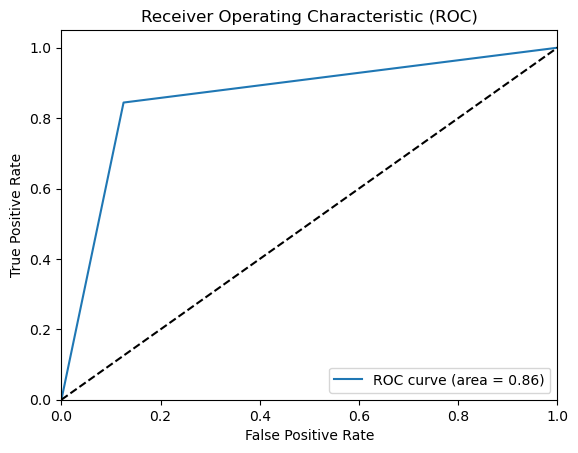

[[601051  86112]
 [   193   1046]]
##########################Penalty:elasticnet, solver:newton-cg, C100##########################
##########################Penalty:elasticnet, solver:newton-cg, C10##########################
##########################Penalty:elasticnet, solver:newton-cg, C1.0##########################
##########################Penalty:elasticnet, solver:newton-cg, C0.1##########################
##########################Penalty:elasticnet, solver:newton-cg, C0.01##########################
##########################Penalty:elasticnet, solver:lbfgs, C100##########################
##########################Penalty:elasticnet, solver:lbfgs, C10##########################
##########################Penalty:elasticnet, solver:lbfgs, C1.0##########################
##########################Penalty:elasticnet, solver:lbfgs, C0.1##########################
##########################Penalty:elasticnet, solver:lbfgs, C0.01##########################
##########################Penalty:e

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


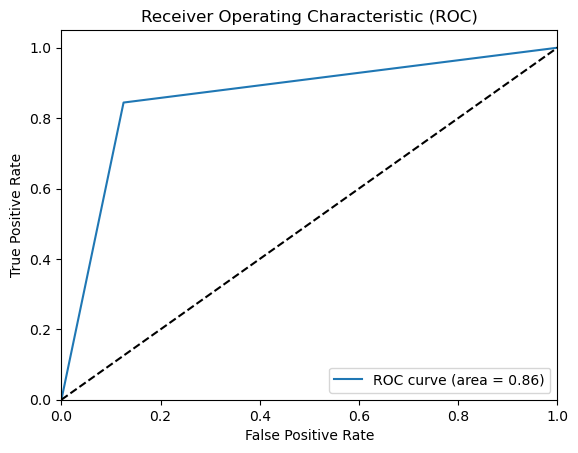

[[601050  86113]
 [   193   1046]]
##########################Penalty:none, solver:newton-cg, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


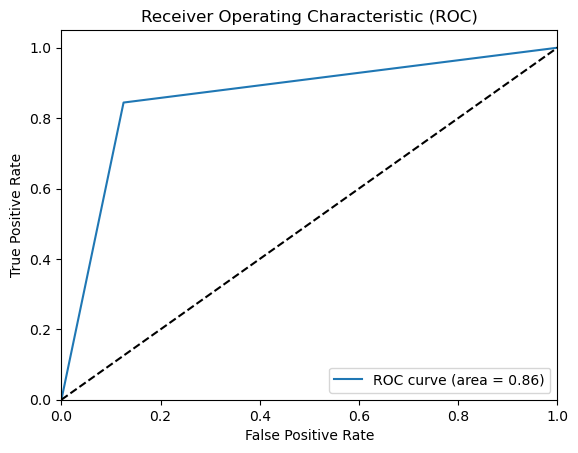

[[601050  86113]
 [   193   1046]]
##########################Penalty:none, solver:newton-cg, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


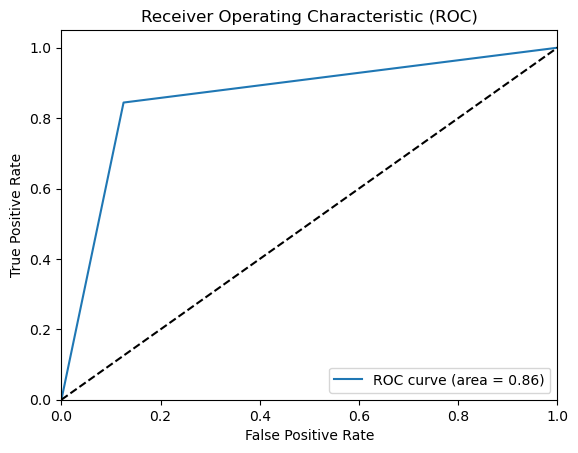

[[601050  86113]
 [   193   1046]]
##########################Penalty:none, solver:newton-cg, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


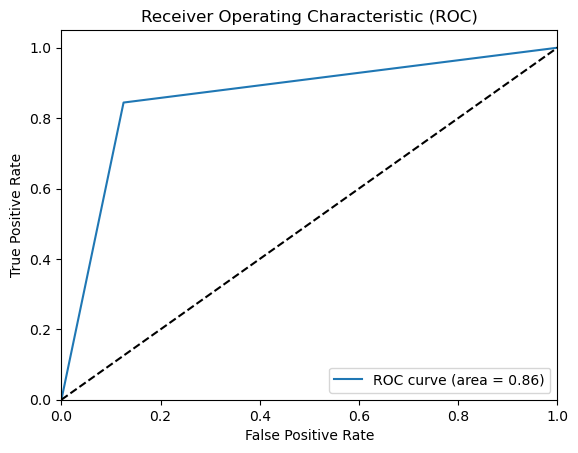

[[601050  86113]
 [   193   1046]]
##########################Penalty:none, solver:newton-cg, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


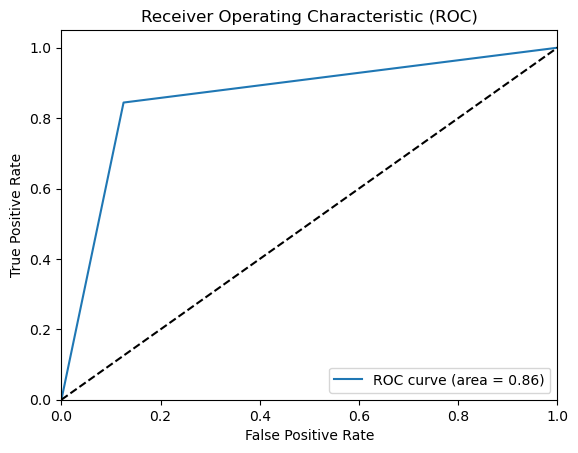

[[601050  86113]
 [   193   1046]]
##########################Penalty:none, solver:lbfgs, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


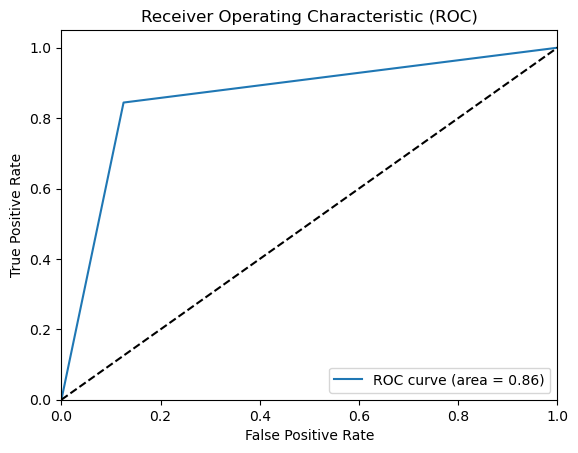

[[601051  86112]
 [   193   1046]]
##########################Penalty:none, solver:lbfgs, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


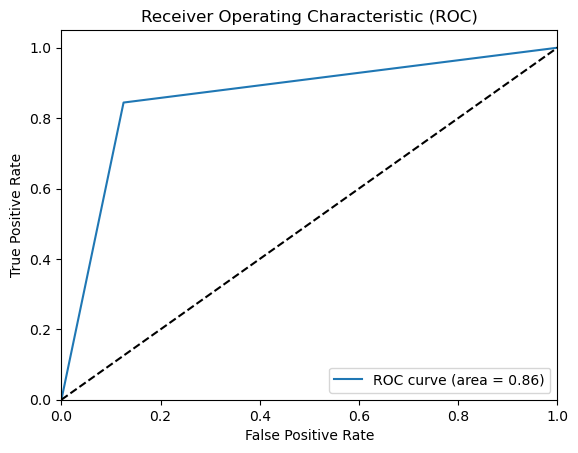

[[601051  86112]
 [   193   1046]]
##########################Penalty:none, solver:lbfgs, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


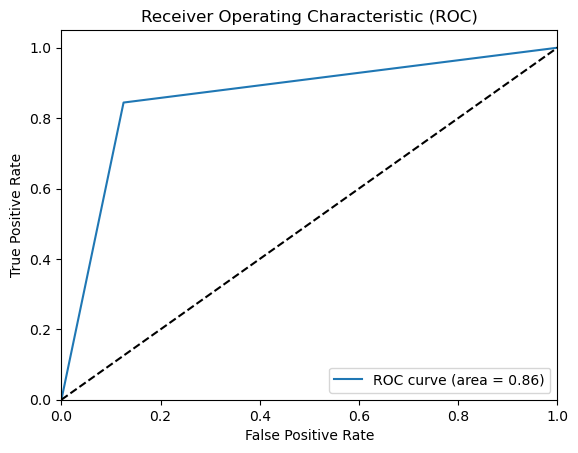

[[601051  86112]
 [   193   1046]]
##########################Penalty:none, solver:lbfgs, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


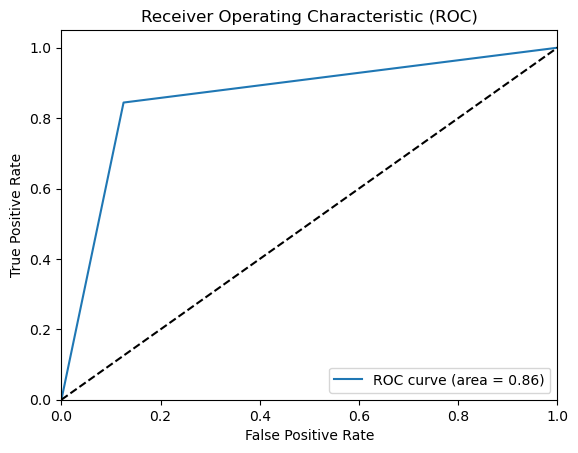

[[601051  86112]
 [   193   1046]]
##########################Penalty:none, solver:lbfgs, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


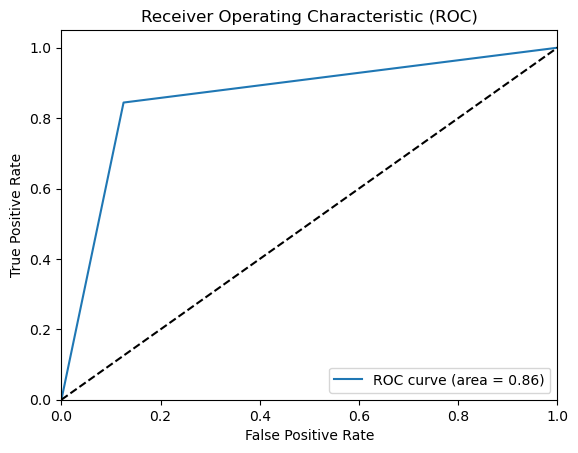

[[601051  86112]
 [   193   1046]]
##########################Penalty:none, solver:liblinear, C100##########################
##########################Penalty:none, solver:liblinear, C10##########################
##########################Penalty:none, solver:liblinear, C1.0##########################
##########################Penalty:none, solver:liblinear, C0.1##########################
##########################Penalty:none, solver:liblinear, C0.01##########################
##########################Penalty:none, solver:sag, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


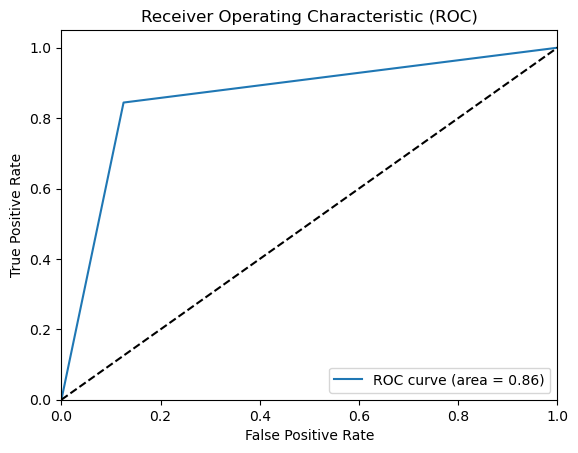

[[601051  86112]
 [   193   1046]]
##########################Penalty:none, solver:sag, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


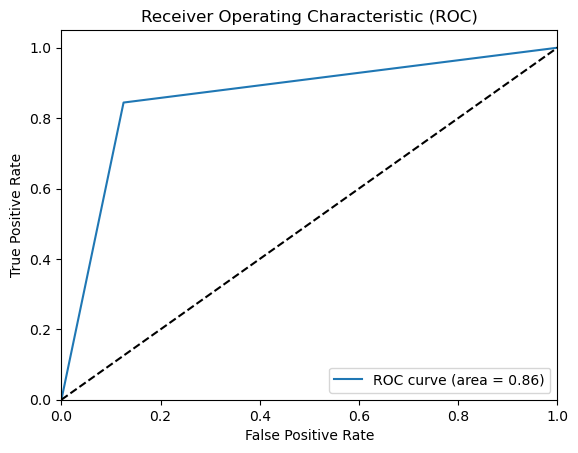

[[601051  86112]
 [   193   1046]]
##########################Penalty:none, solver:sag, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


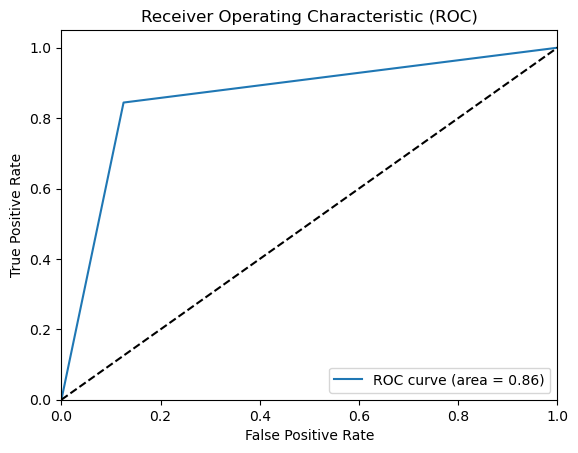

[[601051  86112]
 [   193   1046]]
##########################Penalty:none, solver:sag, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


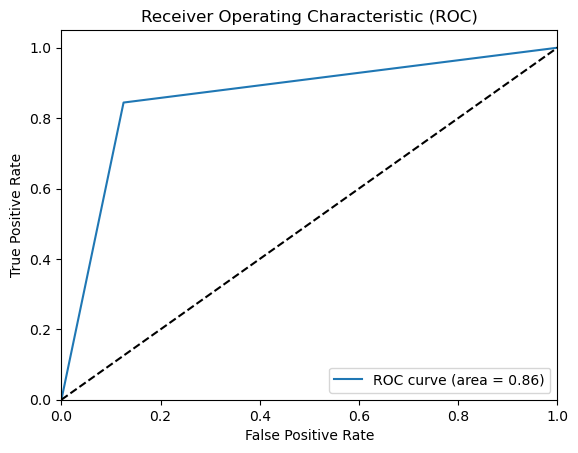

[[601051  86112]
 [   193   1046]]
##########################Penalty:none, solver:sag, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


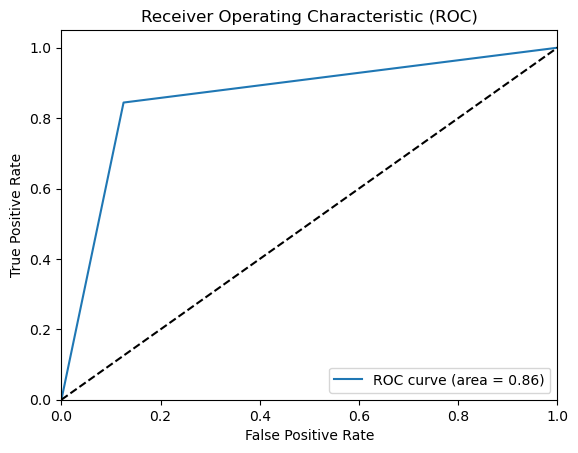

[[601051  86112]
 [   193   1046]]
##########################Penalty:none, solver:saga, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


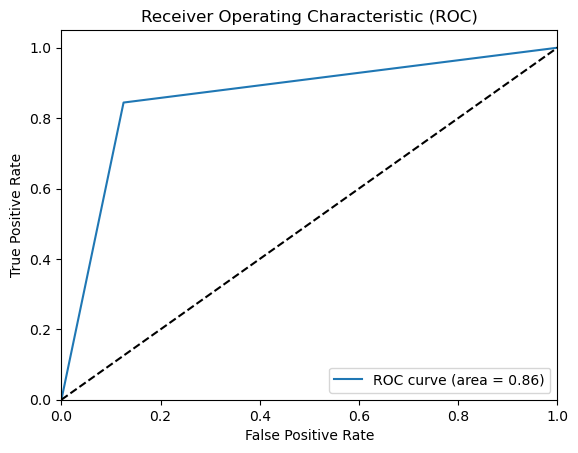

[[601051  86112]
 [   193   1046]]
##########################Penalty:none, solver:saga, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


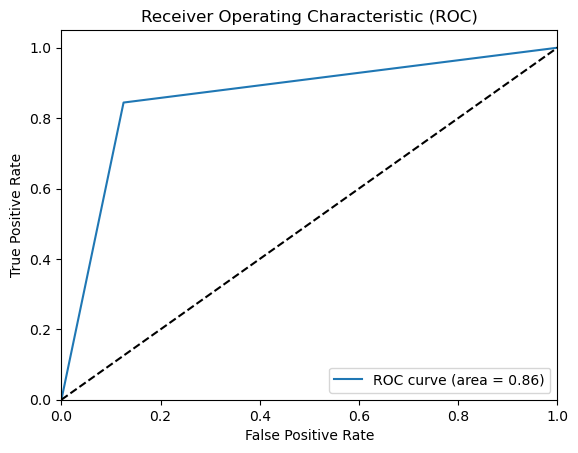

[[601051  86112]
 [   193   1046]]
##########################Penalty:none, solver:saga, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


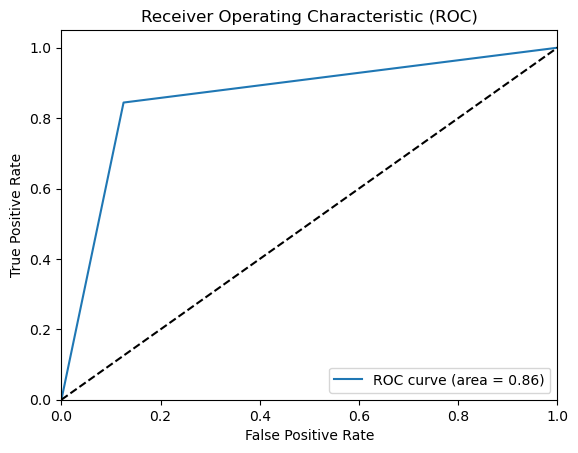

[[601051  86112]
 [   193   1046]]
##########################Penalty:none, solver:saga, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


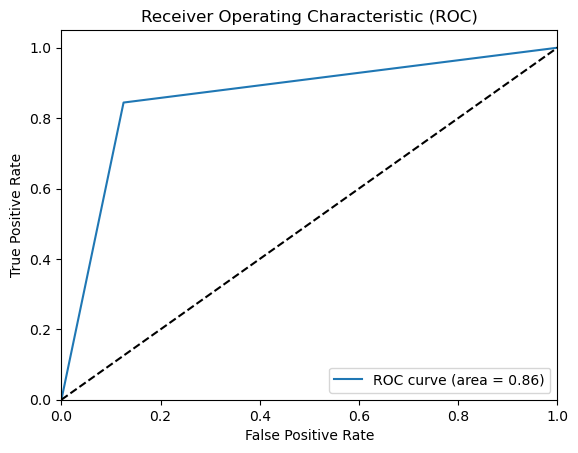

[[601051  86112]
 [   193   1046]]
##########################Penalty:none, solver:saga, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.47  0.36 -0.17 -1.02 -0.06 -0.02  1.4   0.63]]
[0.52]


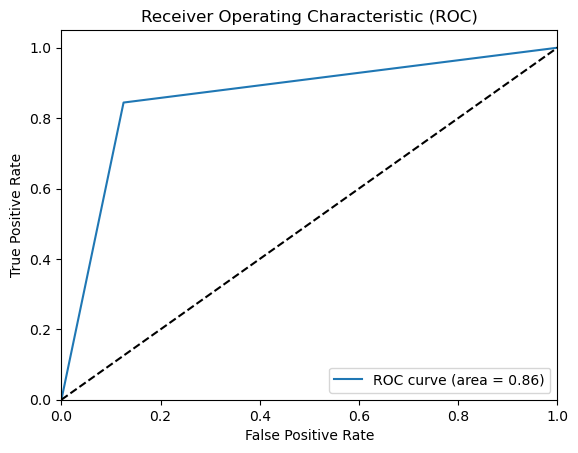

[[601051  86112]
 [   193   1046]]


In [6]:
### estremamente più veloce
from sklearn.preprocessing import StandardScaler
trainScaler = StandardScaler()

x_train_scaled = trainScaler.fit_transform(x_train_sm)
x_val_scaled = trainScaler.transform(x_val)
x_test_scaled = trainScaler.transform(x_test)

logistic_regression_with_val(x_train_scaled,y_train_sm,x_val_scaled,y_val)

In [10]:
### repeat focusing on coefficient visualization

logistic_regression_with_val(x_train_scaled,y_train_sm.values.reshape(-1,),x_val_scaled,y_val.values.reshape(-1,))

##########################Penalty:l1, solver:newton-cg, C100##########################
##########################Penalty:l1, solver:lbfgs, C100##########################
##########################Penalty:l1, solver:liblinear, C100##########################
[[-1.47194995  0.36142446 -0.16610907 -1.01713725 -0.05798067 -0.02596147
   1.40122897  0.62906696]]
[0.51783466]
##########################Penalty:l1, solver:sag, C100##########################
##########################Penalty:l1, solver:saga, C100##########################
[[-1.47220259  0.36131639 -0.16614909 -1.01725342 -0.0579181  -0.02600911
   1.40143211  0.62904104]]
[0.51800091]
##########################Penalty:l2, solver:newton-cg, C100##########################
[[-1.47218247  0.36130389 -0.16615436 -1.01724929 -0.05793508 -0.02601295
   1.40144875  0.62904446]]
[0.51799432]
##########################Penalty:l2, solver:lbfgs, C100##########################
[[-1.47215331  0.36129291 -0.16615269 -1.01721872 -0.05794391 -0.

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-1.47218257  0.36130388 -0.16615436 -1.01724934 -0.05793507 -0.02601296
   1.40144879  0.62904447]]
[0.51799436]
##########################Penalty:none, solver:lbfgs, C100##########################
[[-1.47215341  0.36129289 -0.16615269 -1.01721876 -0.0579439  -0.02600552
   1.40142922  0.62903727]]
[0.51796638]
##########################Penalty:none, solver:liblinear, C100##########################
##########################Penalty:none, solver:sag, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-1.47219028  0.36130203 -0.1661216  -1.01722758 -0.0579491  -0.02602331
   1.40143719  0.62907848]]
[0.51800609]
##########################Penalty:none, solver:saga, C100##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-1.47220266  0.36131639 -0.16614911 -1.01725345 -0.0579181  -0.02600914
   1.40143214  0.62904105]]
[0.51800094]
##########################Penalty:l1, solver:newton-cg, C10##########################
##########################Penalty:l1, solver:lbfgs, C10##########################
##########################Penalty:l1, solver:liblinear, C10##########################
[[-1.47194914  0.36142451 -0.16610893 -1.01713685 -0.05798064 -0.02596121
   1.40122871  0.62906686]]
[0.51783424]
##########################Penalty:l1, solver:sag, C10##########################
##########################Penalty:l1, solver:saga, C10##########################
[[-1.47220197  0.36131641 -0.16614893 -1.01725308 -0.05791805 -0.02600887
   1.40143191  0.62904093]]
[0.51800066]
##########################Penalty:l2, solver:newton-cg, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[[-1.47218154  0.36130406 -0.16615436 -1.0172489  -0.05793516 -0.02601287
   1.40144834  0.62904439]]
[0.51799393]
##########################Penalty:l2, solver:lbfgs, C10##########################
[[-1.47215238  0.36129307 -0.16615269 -1.01721832 -0.05794398 -0.02600542
   1.40142878  0.62903719]]
[0.51796594]
##########################Penalty:l2, solver:liblinear, C10##########################
[[-1.47216498  0.36127783 -0.16616256 -1.01724543 -0.05793773 -0.02601044
   1.40147348  0.62904248]]
[0.51798584]
##########################Penalty:l2, solver:sag, C10##########################
[[-1.4721888   0.36130234 -0.16612185 -1.01722786 -0.0579489  -0.0260237
   1.40143662  0.62907707]]
[0.51800525]
##########################Penalty:l2, solver:saga, C10##########################
[[-1.47220161  0.36131654 -0.16614906 -1.01725306 -0.05791824 -0.02600904
   1.40143169  0.62904103]]
[0.51800049]
##########################Penalty:elasticnet, solver:newton-cg, C10##########################
###

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-1.47218257  0.36130388 -0.16615436 -1.01724934 -0.05793507 -0.02601296
   1.40144879  0.62904447]]
[0.51799436]
##########################Penalty:none, solver:lbfgs, C10##########################
[[-1.47215341  0.36129289 -0.16615269 -1.01721876 -0.0579439  -0.02600552
   1.40142922  0.62903727]]
[0.51796638]
##########################Penalty:none, solver:liblinear, C10##########################
##########################Penalty:none, solver:sag, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-1.47219028  0.36130203 -0.1661216  -1.01722758 -0.0579491  -0.02602331
   1.40143719  0.62907848]]
[0.51800609]
##########################Penalty:none, solver:saga, C10##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-1.47220266  0.36131639 -0.16614911 -1.01725345 -0.0579181  -0.02600914
   1.40143214  0.62904105]]
[0.51800094]
##########################Penalty:l1, solver:newton-cg, C1.0##########################
##########################Penalty:l1, solver:lbfgs, C1.0##########################
##########################Penalty:l1, solver:liblinear, C1.0##########################
[[-1.47194108  0.36142506 -0.16610752 -1.01713294 -0.05798034 -0.02595863
   1.40122609  0.62906587]]
[0.51783007]
##########################Penalty:l1, solver:sag, C1.0##########################
##########################Penalty:l1, solver:saga, C1.0##########################
[[-1.47219573  0.36131664 -0.16614734 -1.01724972 -0.05791763 -0.02600646
   1.40142992  0.62903986]]
[0.51799818]
##########################Penalty:l2, solver:newton-cg, C1.0##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[[-1.4721722   0.36130568 -0.16615439 -1.01724497 -0.05793592 -0.026012
   1.4014444   0.6290437 ]]
[0.51798998]
##########################Penalty:l2, solver:lbfgs, C1.0##########################
[[-1.4721431   0.36129469 -0.16615271 -1.01721439 -0.05794475 -0.02600455
   1.40142481  0.62903649]]
[0.517962]
##########################Penalty:l2, solver:liblinear, C1.0##########################
[[-1.47215476  0.36127962 -0.16616267 -1.0172412  -0.05793856 -0.02600948
   1.40146918  0.62904182]]
[0.51798102]
##########################Penalty:l2, solver:sag, C1.0##########################
[[-1.47219623  0.36137245 -0.16611006 -1.01721827 -0.05794068 -0.02599906
   1.40147231  0.62905525]]
[0.51796402]
##########################Penalty:l2, solver:saga, C1.0##########################
[[-1.47219209  0.36131792 -0.16614859 -1.0172495  -0.05791945 -0.02600823
   1.40142773  0.62904087]]
[0.51799646]
##########################Penalty:elasticnet, solver:newton-cg, C1.0##########################
#

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[[-1.47218257  0.36130388 -0.16615436 -1.01724934 -0.05793507 -0.02601296
   1.40144879  0.62904447]]
[0.51799436]
##########################Penalty:none, solver:lbfgs, C1.0##########################
[[-1.47215341  0.36129289 -0.16615269 -1.01721876 -0.0579439  -0.02600552
   1.40142922  0.62903727]]
[0.51796638]
##########################Penalty:none, solver:liblinear, C1.0##########################
##########################Penalty:none, solver:sag, C1.0##########################
[[-1.47219028  0.36130203 -0.1661216  -1.01722758 -0.0579491  -0.02602331
   1.40143719  0.62907848]]
[0.51800609]
##########################Penalty:none, solver:saga, C1.0##########################
[[-1.47220266  0.36131639 -0.16614911 -1.01725345 -0.0579181  -0.02600914
   1.40143214  0.62904105]]
[0.51800094]
##########################Penalty:l1, solver:newton-cg, C0.1##########################
##########################Penalty:l1, solver:lbfgs, C0.1##########################
##########################Pen

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[[-1.4720795   0.3613219  -0.1661546  -1.01720556 -0.05794363 -0.02600332
   1.40140467  0.62903668]]
[0.51795059]
##########################Penalty:l2, solver:lbfgs, C0.1##########################
[[-1.47205034  0.36131092 -0.16615293 -1.017175   -0.05795246 -0.02599588
   1.40138511  0.62902948]]
[0.51792261]
##########################Penalty:l2, solver:liblinear, C0.1##########################
[[-1.47205254  0.36129754 -0.16616383 -1.01719894 -0.05794693 -0.02599988
   1.40142619  0.62903522]]
[0.51793283]
##########################Penalty:l2, solver:sag, C0.1##########################
[[-1.47209204  0.36130117 -0.16619244 -1.01723181 -0.05796584 -0.02599941
   1.40141437  0.62904264]]
[0.51792296]
##########################Penalty:l2, solver:saga, C0.1##########################
[[-1.47209705  0.36133168 -0.16614601 -1.01721283 -0.05793052 -0.02600086
   1.40138935  0.62903786]]
[0.51795589]
##########################Penalty:elasticnet, solver:newton-cg, C0.1########################

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-1.47218257  0.36130388 -0.16615436 -1.01724934 -0.05793507 -0.02601296
   1.40144879  0.62904447]]
[0.51799436]
##########################Penalty:none, solver:lbfgs, C0.1##########################
[[-1.47215341  0.36129289 -0.16615269 -1.01721876 -0.0579439  -0.02600552
   1.40142922  0.62903727]]
[0.51796638]
##########################Penalty:none, solver:liblinear, C0.1##########################
##########################Penalty:none, solver:sag, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-1.47219028  0.36130203 -0.1661216  -1.01722758 -0.0579491  -0.02602331
   1.40143719  0.62907848]]
[0.51800609]
##########################Penalty:none, solver:saga, C0.1##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-1.47220266  0.36131639 -0.16614911 -1.01725345 -0.0579181  -0.02600914
   1.40143214  0.62904105]]
[0.51800094]
##########################Penalty:l1, solver:newton-cg, C0.01##########################
##########################Penalty:l1, solver:lbfgs, C0.01##########################
##########################Penalty:l1, solver:liblinear, C0.01##########################
[[-1.47105545  0.36148512 -0.16595224 -1.0167027  -0.05794726 -0.02567403
   1.4009379   0.62895741]]
[0.51737133]
##########################Penalty:l1, solver:sag, C0.01##########################
##########################Penalty:l1, solver:saga, C0.01##########################
[[-1.47150985  0.36134141 -0.16597186 -1.01687996 -0.05787078 -0.02574126
   1.40121044  0.62892273]]
[0.51772551]
##########################Penalty:l2, solver:newton-cg, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[[-1.47115289  0.36148398 -0.16615678 -1.01681197 -0.05802063 -0.02591668
   1.40100794  0.62896659]]
[0.51755709]
##########################Penalty:l2, solver:lbfgs, C0.01##########################
[[-1.47112374  0.36147305 -0.16615509 -1.01678151 -0.05802944 -0.02590925
   1.40098841  0.62895942]]
[0.51752912]
##########################Penalty:l2, solver:liblinear, C0.01##########################
[[-1.4710317   0.36147653 -0.16617538 -1.01677671 -0.05803048 -0.025904
   1.40099664  0.62896922]]
[0.51745155]
##########################Penalty:l2, solver:sag, C0.01##########################
[[-1.47117037  0.3614544  -0.16615275 -1.01680518 -0.05798117 -0.02591659
   1.40103548  0.62893119]]
[0.51756919]
##########################Penalty:l2, solver:saga, C0.01##########################
[[-1.47111221  0.36149019 -0.16614747 -1.01682061 -0.05801203 -0.02591135
   1.40102195  0.62896677]]
[0.51753666]
##########################Penalty:elasticnet, solver:newton-cg, C0.01#####################

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-1.47218257  0.36130388 -0.16615436 -1.01724934 -0.05793507 -0.02601296
   1.40144879  0.62904447]]
[0.51799436]
##########################Penalty:none, solver:lbfgs, C0.01##########################
[[-1.47215341  0.36129289 -0.16615269 -1.01721876 -0.0579439  -0.02600552
   1.40142922  0.62903727]]
[0.51796638]
##########################Penalty:none, solver:liblinear, C0.01##########################
##########################Penalty:none, solver:sag, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-1.47219028  0.36130203 -0.1661216  -1.01722758 -0.0579491  -0.02602331
   1.40143719  0.62907848]]
[0.51800609]
##########################Penalty:none, solver:saga, C0.01##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-1.47220266  0.36131639 -0.16614911 -1.01725345 -0.0579181  -0.02600914
   1.40143214  0.62904105]]
[0.51800094]


In [12]:
# Try with smaller C to get regularizations

logistic_regression_with_val(x_train_scaled,y_train_sm.values.reshape(-1,),x_val_scaled,y_val.values.reshape(-1,))

##########################Penalty:l1, solver:newton-cg, C0.001##########################
##########################Penalty:l1, solver:lbfgs, C0.001##########################
##########################Penalty:l1, solver:liblinear, C0.001##########################
[[-1.46304174  0.36203002 -0.16454406 -1.01280689 -0.05764621 -0.02309693
   1.39833007  0.62797485]]
[0.51321931]
##########################Penalty:l1, solver:sag, C0.001##########################
##########################Penalty:l1, solver:saga, C0.001##########################
[[-1.46529803  0.36156619 -0.16438092 -1.01352967 -0.05744519 -0.02333811
   1.39922309  0.62786084]]
[0.51525666]
##########################Penalty:l2, solver:newton-cg, C0.001##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[[-1.46199278  0.36308741 -0.16617866 -1.01291052 -0.05878374 -0.02506242
   1.39706999  0.62826707]]
[0.5136644]
##########################Penalty:l2, solver:lbfgs, C0.001##########################
[[-1.46196343  0.36307678 -0.16617701 -1.01288141 -0.05879219 -0.02505502
   1.39705115  0.62826037]]
[0.51363629]
##########################Penalty:l2, solver:liblinear, C0.001##########################
[[-1.46095368  0.36324587 -0.16628966 -1.01259608 -0.0588576  -0.02495996
   1.39673799  0.62831028]]
[0.51269713]
##########################Penalty:l2, solver:sag, C0.001##########################
[[-1.46195924  0.36308652 -0.16622863 -1.01288756 -0.05878115 -0.0250333
   1.39709967  0.62826281]]
[0.51354776]
##########################Penalty:l2, solver:saga, C0.001##########################
[[-1.46195265  0.36309354 -0.16616941 -1.01291916 -0.05877517 -0.02505719
   1.39708392  0.62826726]]
[0.51364415]
##########################Penalty:elasticnet, solver:newton-cg, C0.001################

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-1.47218257  0.36130388 -0.16615436 -1.01724934 -0.05793507 -0.02601296
   1.40144879  0.62904447]]
[0.51799436]
##########################Penalty:none, solver:lbfgs, C0.001##########################
[[-1.47215341  0.36129289 -0.16615269 -1.01721876 -0.0579439  -0.02600552
   1.40142922  0.62903727]]
[0.51796638]
##########################Penalty:none, solver:liblinear, C0.001##########################
##########################Penalty:none, solver:sag, C0.001##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-1.47219028  0.36130203 -0.1661216  -1.01722758 -0.0579491  -0.02602331
   1.40143719  0.62907848]]
[0.51800609]
##########################Penalty:none, solver:saga, C0.001##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-1.47220266  0.36131639 -0.16614911 -1.01725345 -0.0579181  -0.02600914
   1.40143214  0.62904105]]
[0.51800094]
##########################Penalty:l1, solver:newton-cg, C0.0001##########################
##########################Penalty:l1, solver:lbfgs, C0.0001##########################
##########################Penalty:l1, solver:liblinear, C0.0001##########################
[[-1.38663314  0.36708172 -0.15137799 -0.97561263 -0.05454537  0.
   1.37302861  0.61839056]]
[0.47348009]
##########################Penalty:l1, solver:sag, C0.0001##########################
##########################Penalty:l1, solver:saga, C0.0001##########################
[[-1.40542080e+00  3.63770698e-01 -1.48879018e-01 -9.81092795e-01
  -5.32174427e-02 -4.54660734e-05  1.38010163e+00  6.17526203e-01]]
[0.49152659]
##########################Penalty:l2, solver:newton-cg, C0.0001##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[[-1.37968534  0.37756508 -0.16641505 -0.97698614 -0.06578455 -0.0175888
   1.36035966  0.62141692]]
[0.47847523]
##########################Penalty:l2, solver:lbfgs, C0.0001##########################
[[-1.37966737  0.37754734 -0.16641544 -0.97697559 -0.06578721 -0.01757871
   1.36035215  0.62141633]]
[0.47844469]
##########################Penalty:l2, solver:liblinear, C0.0001##########################
[[-1.37139284  0.37908812 -0.16732731 -0.97442034 -0.06641021 -0.01677847
   1.35746992  0.62183022]]
[0.4702235]
##########################Penalty:l2, solver:sag, C0.0001##########################
[[-1.37964412  0.37760242 -0.1664354  -0.97701084 -0.06577139 -0.01758578
   1.36036187  0.621424  ]]
[0.478145]
##########################Penalty:l2, solver:saga, C0.0001##########################
[[-1.37970035  0.37757328 -0.1664066  -0.97699332 -0.06577316 -0.01758661
   1.36034602  0.62141838]]
[0.47847968]
##########################Penalty:elasticnet, solver:newton-cg, C0.0001#############

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-1.47218257  0.36130388 -0.16615436 -1.01724934 -0.05793507 -0.02601296
   1.40144879  0.62904447]]
[0.51799436]
##########################Penalty:none, solver:lbfgs, C0.0001##########################
[[-1.47215341  0.36129289 -0.16615269 -1.01721876 -0.0579439  -0.02600552
   1.40142922  0.62903727]]
[0.51796638]
##########################Penalty:none, solver:liblinear, C0.0001##########################
##########################Penalty:none, solver:sag, C0.0001##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-1.47219028  0.36130203 -0.1661216  -1.01722758 -0.0579491  -0.02602331
   1.40143719  0.62907848]]
[0.51800609]
##########################Penalty:none, solver:saga, C0.0001##########################


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[[-1.47220266  0.36131639 -0.16614911 -1.01725345 -0.0579181  -0.02600914
   1.40143214  0.62904105]]
[0.51800094]


# Results

Data: [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']

In [7]:
#Typical perfomance:
clf = LogisticRegression(random_state=0, penalty='none', solver='newton-cg', C=1).fit(x_train_scaled, y_train_sm)
preds = clf.predict(x_test)
conf = confusion_matrix(y_test, np.round(preds))
np.set_printoptions(precision=2)
print(conf)

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklear

[[533930   4508]
 [   658    391]]


Standardized Results

With C100, C10, C1, C0.1, C0.01 there is no regularization independently from the solver and the penalty (L1,L2 or None):<br>
[-1.47  0.36 -0.17 -1.02 -0.058 -0.026  1.40  0.629]  [0.518]<br>

Repeating with C0.001 no regularization again, while with C0.0001 a bit of regularization is included:<br>
L1: [-1.39  0.36 -0.15 -0.98 -0.055  0.   1.37  0.618]  [0.473]<br>
L2: [-1.38  0.38 -0.17 -0.98 -0.066 -0.0176  1.36  0.621]  [0.478]<br>
None: returns to the not regularized values of coefficients


Non-Standardized Results

With C100:<br>
L1: a) [-11410  0.0196 -0.0129 -0.132  -0.0111  0.00908  0.0260  0.00615]  [2.80]<br>
    b) [-0.0179  0.0228 -0.0134 -0.123 -0.0127  0.0151   0.0280  0.00676]  [3.073]<br>
L2: c)[-1475  0.0224 -0.0134 -0.124  -0.0125  0.0143  0.0276  0.00667]  [3.0177] # very similar to b) but L2 fashion
<br>d) the same with first coefficient almost null for the other solvers<br>
None: again similar to a) or b) depending on the solver

With C10, C1, C0.1:<br>
L1-L2: a), b), c) again depending on the solver 
Parameters become larger and larger with no regularization and many times do not converge

With C0.01 regularization stronger:<br>
L1: [ 0.          0.0229 -0.0134 -0.123 -0.0128  0.0151   0.0280  0.00677]  [3.054]<br> # first to 0, other as b)
L2: keeps the first coefficient small